In [12]:
import pandas as pd
import seaborn as sns
import duckdb
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [16]:


with duckdb.connect("data.duckdb") as conn:
    bird_aggregates = conn.execute('select * from bird_aggregates').df()

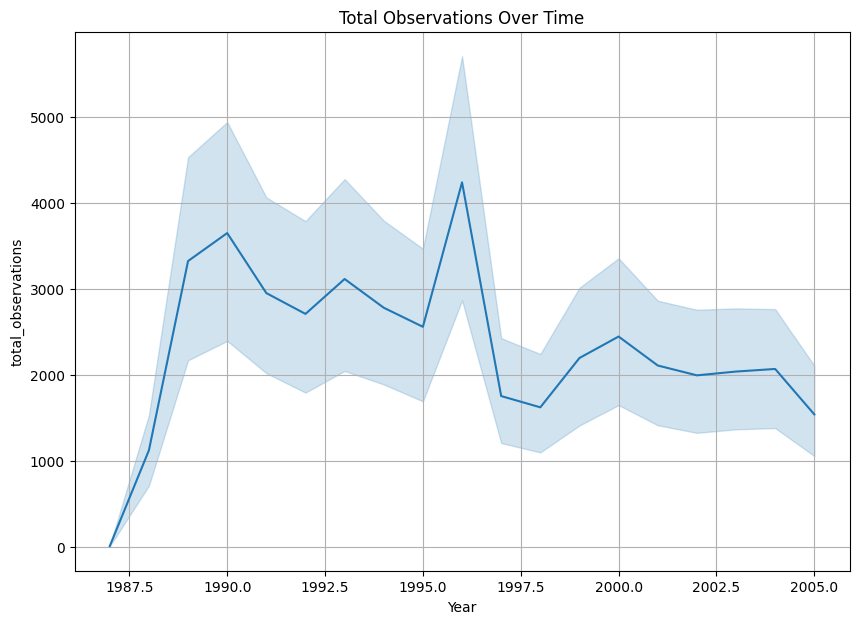

In [17]:
plt.figure(figsize=(10,7))
sns.lineplot(data=bird_aggregates, x="Year", y="total_observations")
plt.title('Total Observations Over Time')
plt.grid()
plt.savefig('total_observations_over_time.png')



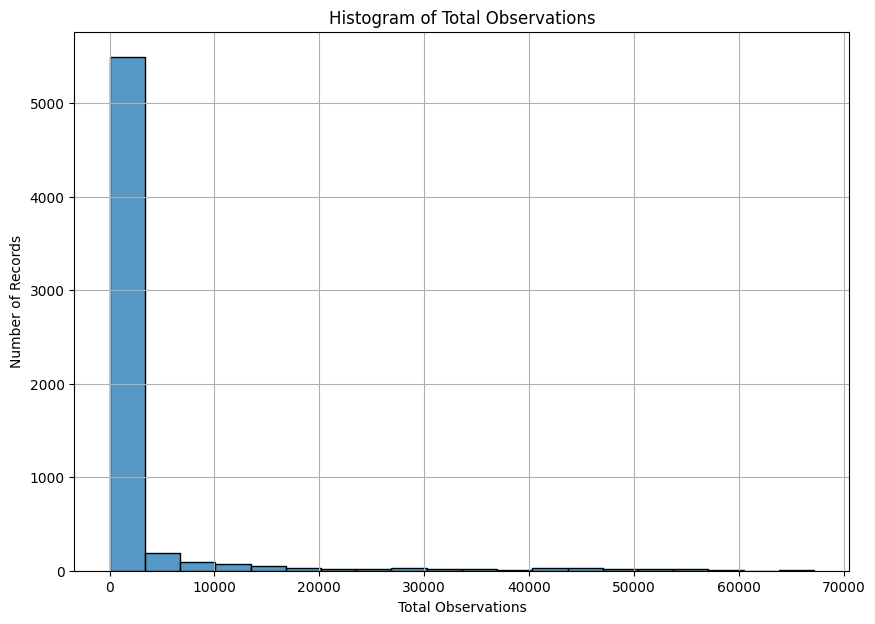

In [4]:

# Histogram of total observations
plt.figure(figsize=(10,7))
sns.histplot(data=bird_aggregates, x="total_observations", bins=20)
plt.title('Histogram of Total Observations')
plt.xlabel('Total Observations')
plt.ylabel('Number of Records')
plt.grid()
plt.savefig('hist_total_observations.png')


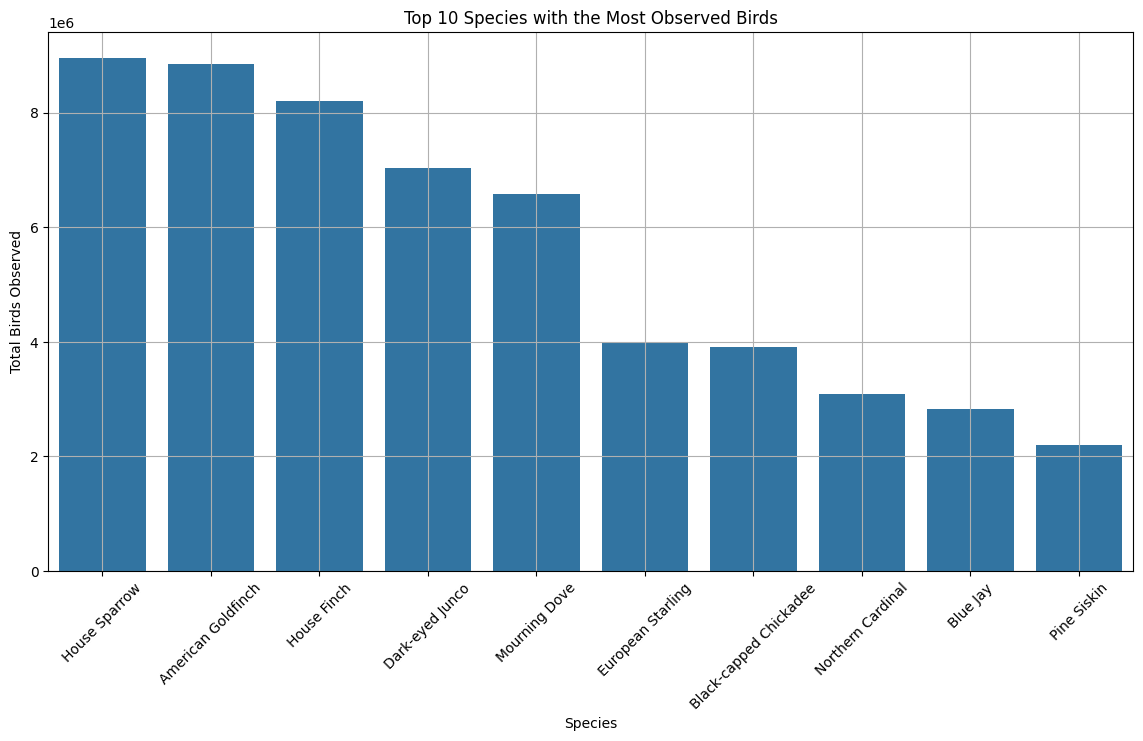

In [5]:
# Top 10 species with the most observed birds
plt.figure(figsize=(14,7))
top_species = bird_aggregates.groupby('species_name')['total_birds'].sum().nlargest(10)
sns.barplot(x=top_species.index, y=top_species.values)
plt.title('Top 10 Species with the Most Observed Birds')
plt.xlabel('Species')
plt.ylabel('Total Birds Observed')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('top_species_total_birds.png')
